<a href="https://colab.research.google.com/github/ravichandranNa/AJ_ML_Library/blob/master/HRJANHACK_AV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # HR ANALYTICS: 
The kernel aims to operate on Design thinking (AI Enterprise Workflow) model to formulate a strategy for a Training Organisation on the problem statement elucidated below. This kernel is applied to the Define & Ideate process of AI Enterprise Work Flow.Further, this kernel is WIP one and the Contributors are welcomed to improvise and build a robust model with improved accuracy and other relevant metrics. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### **The Design Thinking Framework**:
###### *Enpathize* : Empathy is the centerpiece of a human-centered design process. The Empathize mode is the work you do to understand people, within the context of your design challenge. It is your effort to understand the way they do things and why, their physical and emotional needs, how they think about world, and what is meaningful to them.

###### *Define*: The goal of the Define mode is to craft a meaningful and actionable problem statement – this is what we call a point-of-view. This should be a guiding statement that focuses on insights and needs of a particular user, or composite character. Insights don’t often just jump in your lap; rather they emerge from a process of synthesizing information to discover connections and patterns. In a word, the Define mode is sensemaking.

###### *Ideate*: Ideate is the mode of the design process in which you concentrate on idea generation.Mentally it represents a process of “going wide” in terms of concepts and outcomes. Ideation provides both the fuel and also the source material for building prototypes and getting innovative solutions into the hands of your users. 

###### *Prototype*: The Prototype mode is the iterative generation of artifacts intended to answer questions that get you closer to your final solution. In the early stages of a project that question may be broad – such as “do my users enjoy cooking in a competitive manner?” In these early stages, you should create low-resolution prototypes that are quick and cheap to make (think minutes and cents) but can elicit useful feedback from users and colleagues. In later stages both your prototype and question may get a little more refined. For example, you may create a later stage prototype for the cooking project that aims to find out: “do my users enjoy cooking with voice commands or visual commands”. 

###### *Test*: The Test mode is when you solicit feedback, about the prototypes you have created, from your users and have another opportunity to gain empathy for the people you are designing for. Testing is another opportunity to understand your user, but unlike your initial empathy mode, you have now likely done more framing of the problem and created prototypes to test.

###### Courtesy: https://dschool-old.stanford.edu/sandbox/groups/designresources/wiki/36873/attachments/74b3d/ModeGuideBOOTCAMP2010L.pdf


####DEFINE: PROBLEM STATEMENT
######A training institute which conducts training for analytics/ data science wants to expand their business to manpower recruitment (data science only) as well. 
 
Company gets large number of signups for their trainings. Now, company wants to connect these enrollees with their clients who are looking to hire employees working in the same domain. Before that, it is important to know which of these candidates are really looking for a new employment. They have student information related to demographics, education, experience and features related to training as well.

##### DATA UNDERSTANDING

In [ ]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True,font_scale=1)
import missingno as msno
from scipy.stats import norm
import itertools
from scipy.stats import ttest_ind
from scipy import stats
from statsmodels.stats import weightstats as stests
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn import ensemble

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading Train & Test Datasets.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/HRJANHACK/train_jqd04QH.csv')
df_test= pd.read_csv('/content/drive/My Drive/HRJANHACK/test_KaymcHn.csv')

In [ ]:
!pip install python

In [ ]:
import pandas_profiling

report = pandas_profiling.ProfileReport(df_test)



TypeError: ignored

Data columns definition 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [ ]:
df['target'] = df['target'].astype(object)

In [ ]:
df.isna().sum()


enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [ ]:
df.describe()

,enrollee_id,city_development_index,training_hours
count,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014
std,9643.749725,0.110189,60.885300
min,1.000000,0.448000,1.000000
25%,8378.500000,0.796000,23.000000
50%,16706.000000,0.910000,47.000000
75%,25148.500000,0.920000,89.000000
max,33380.000000,0.949000,336.000000


######There are 18359 unique enrollees and the description of variables such as mean, std deviation are mentioned.Above table (basic statical description)shows descriptive statistics of continuous variables from original data. Training hrs is between 1 and 336 hrs. Minimum value and first quantiles of values are not balanced and the distribution may not be normal.

##### Missing value identification: The plot shows missing values of all variables.

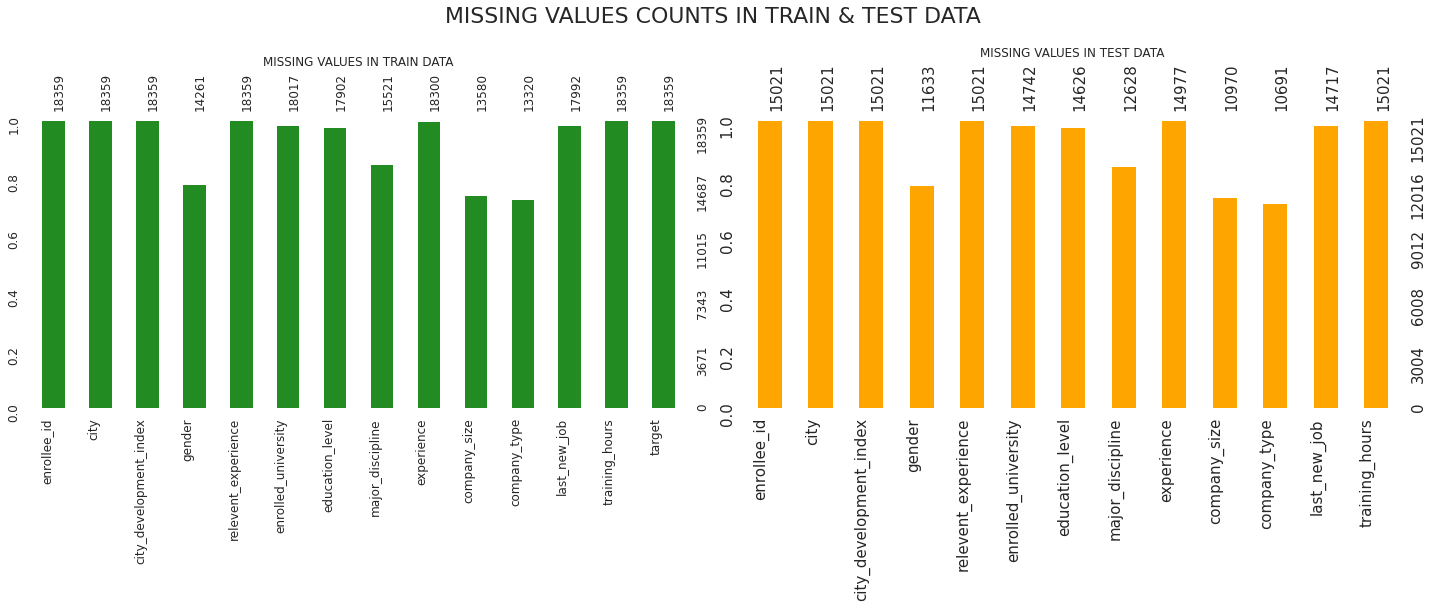

In [ ]:
# Set up the matplotlib figure
f, axes = plt.subplots(1,2, figsize=(20,8))
sns.despine(left=True)

plt.suptitle('MISSING VALUES COUNTS IN TRAIN & TEST DATA ',y=1.05, fontsize=22)

ax1= msno.bar(df, fontsize=12, color='forestgreen',ax= axes[0]).set_title('MISSING VALUES IN TRAIN DATA')
ax2= msno.bar(df_test, fontsize=15, color='orange',ax= axes[1]).set_title('MISSING VALUES IN TEST DATA')


for ax in f.axes:
    ax.tick_params(labelrotation=90)

plt.tight_layout()
plt.show()

#####Building a Dataframe for identifying the propotion of the missing values in each feature of the dataset.

In [ ]:
ms_train=pd.DataFrame(df.isnull().sum(),columns=["Count_train"])
ms_train['Count_test']= df_test.isnull().sum()
ms_train['prop_of_missing_values_train']= df.isnull().sum()/len(df)*100
ms_train['prop_of_missing_values_test']= df_test.isnull().sum()/len(df_test)*100
ms_train

,Count_train,Count_test,prop_of_missing_values_train,prop_of_missing_values_test
enrollee_id,0,0.0,0.000000,0.000000
city,0,0.0,0.000000,0.000000
city_development_index,0,0.0,0.000000,0.000000
gender,4098,3388.0,22.321477,22.555090
relevent_experience,0,0.0,0.000000,0.000000
enrolled_university,342,279.0,1.862847,1.857400
education_level,457,395.0,2.489242,2.629652
major_discipline,2838,2393.0,15.458358,15.931030
experience,59,44.0,0.321368,0.292923
company_size,4779,4051.0,26.030830,26.968910


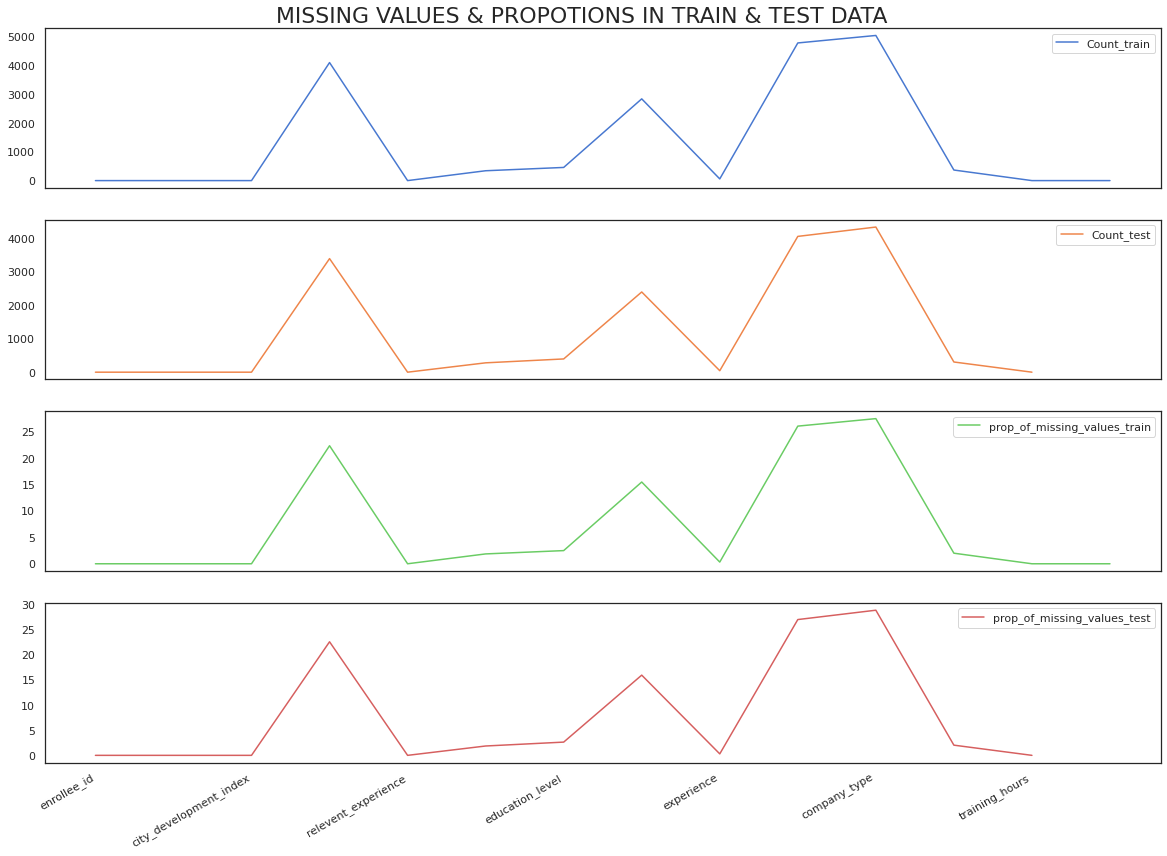

In [ ]:
ms_train.plot(subplots=True, figsize=(20,15))
plt.suptitle('MISSING VALUES & PROPOTIONS IN TRAIN & TEST DATA ',y=.9, fontsize=22)
plt.show()

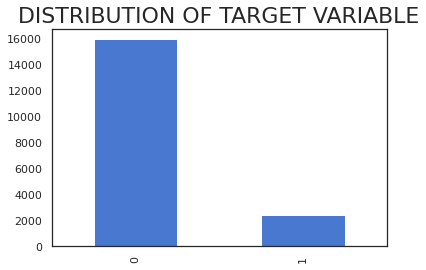

In [ ]:
df['target'].value_counts().plot(kind='bar');
plt.title('DISTRIBUTION OF TARGET VARIABLE',fontdict={'fontsize': 22, 'fontweight': 'medium'})
plt.show()

Training Hours Skewness: 1.813029816790741
Training Hours Kurtosis: 3.7459682666467153


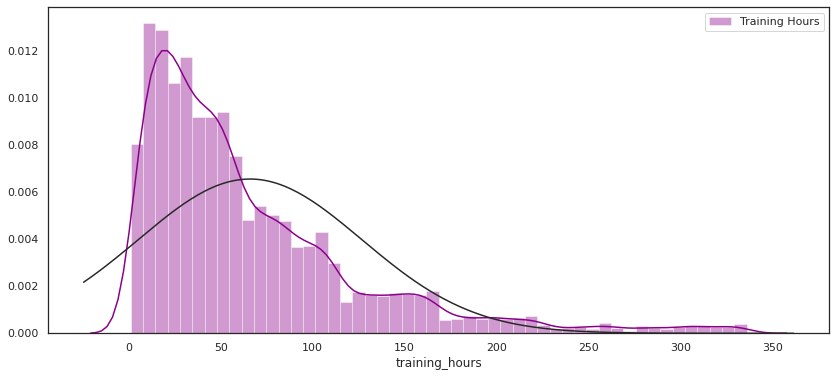

In [ ]:

plt.figure(figsize=(14,6))
print('Training Hours Skewness:', df['training_hours'].skew())
print('Training Hours Kurtosis:', df['training_hours'].kurt())

sns.distplot(df['training_hours'], fit=norm, label='Training Hours',color='darkmagenta')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

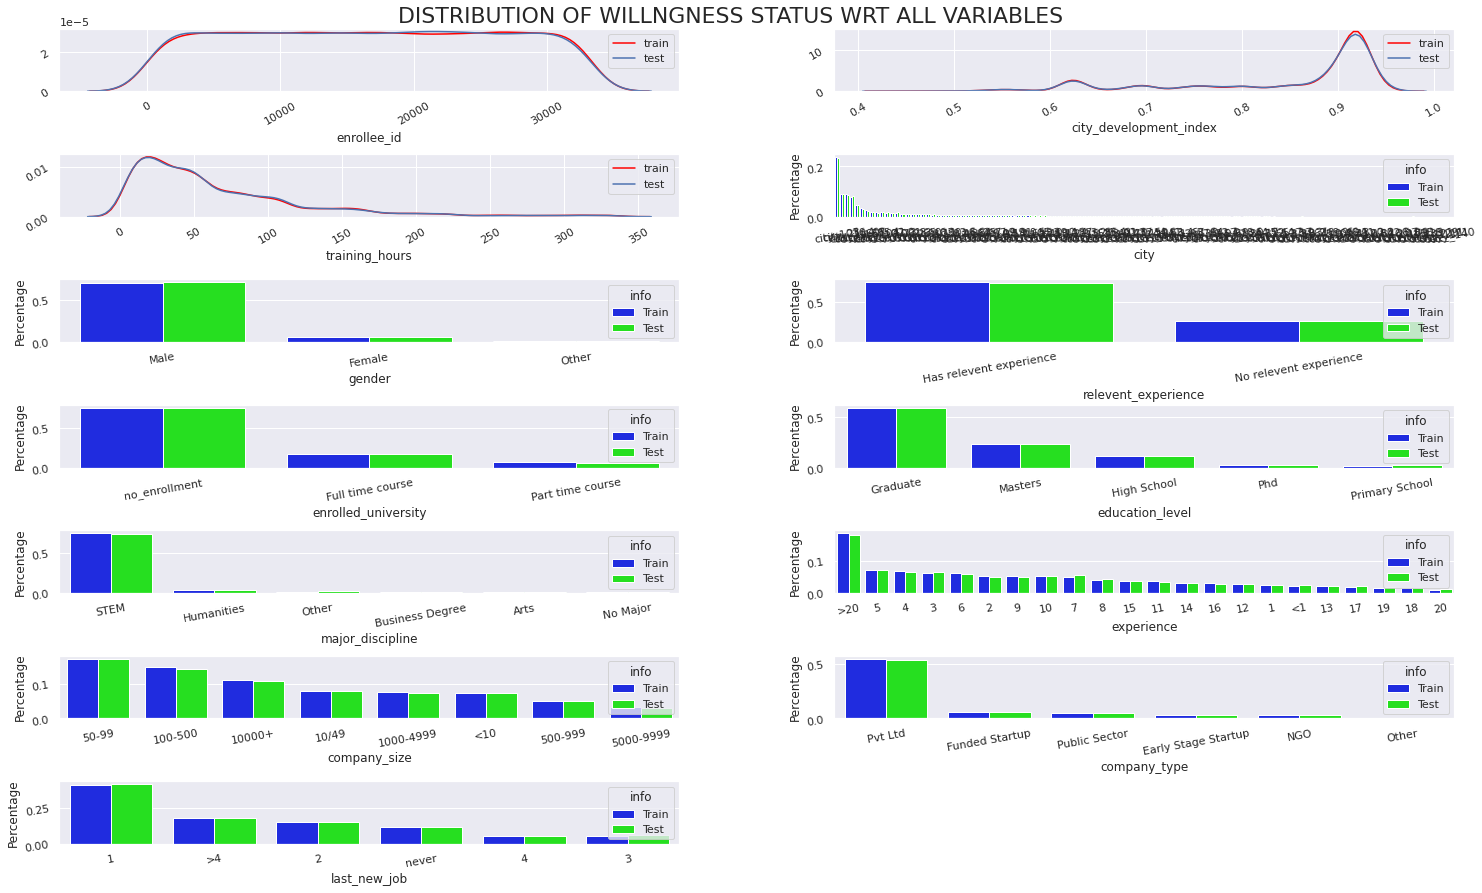

In [ ]:
%matplotlib inline
sns.set(style='darkgrid')
def distComparison(df1, df2):
    a = len(df1.columns)
    if a%2 != 0:
        a += 1
    
    n = np.floor(np.sqrt(a)).astype(np.int64)
    
    while a%n != 0:
        n -= 1
    
    m = (a/n).astype(np.int64)
    coords = list(itertools.product(list(range(m)), list(range(n))))
    
    numerics = df1.select_dtypes(include=[np.number]).columns
    cats = df1.select_dtypes(include=['object']).columns    
    
    fig = plt.figure(figsize=(25, 15))
    axes = gs.GridSpec(m, n)
    axes.update(wspace=0.25, hspace=1.0)
    plt.suptitle('DISTRIBUTION OF WILLNGNESS STATUS WRT ALL VARIABLES ',y=.9, fontsize=22)
    
    for i in range(len(numerics)):
        x, y = coords[i]
        ax = plt.subplot(axes[x, y])
        col = numerics[i]
        sns.kdeplot(df1[col].dropna(), ax=ax, label='train',color= 'red').set(xlabel=col)
        sns.kdeplot(df2[col].dropna(), ax=ax, label='test')
        ax.tick_params(labelrotation=30)
        
    for i in range(0, len(cats)):
        x, y = coords[len(numerics)+i]
        ax = plt.subplot(axes[x, y])
        col = cats[i]

        df1_temp = df1[col].value_counts()
        df2_temp = df2[col].value_counts()
        df1_temp = pd.DataFrame({col: df1_temp.index, 'value': df1_temp/len(df1), 'info': np.repeat('Train', len(df1_temp))})
        df2_temp = pd.DataFrame({col: df2_temp.index, 'value': df2_temp/len(df2), 'info': np.repeat('Test', len(df2_temp))})
        
        sns.barplot(x=col, y='value', hue='info', data=pd.concat([df1_temp, df2_temp]), ax=ax,palette='hsv_r',ci=None).set(ylabel='Percentage')
        
        ax.tick_params(labelrotation=10)
     
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)  
plt.show()  
        
distComparison(df.drop('target', 1), df_test)

#####Summary: The train and test distribution graph of each variable apparently looks very similar.So building a model with train and implementing on the test data may have similiar implications.

In [ ]:
df.set_index('enrollee_id',inplace=True)
df_test.set_index('enrollee_id',inplace=True)

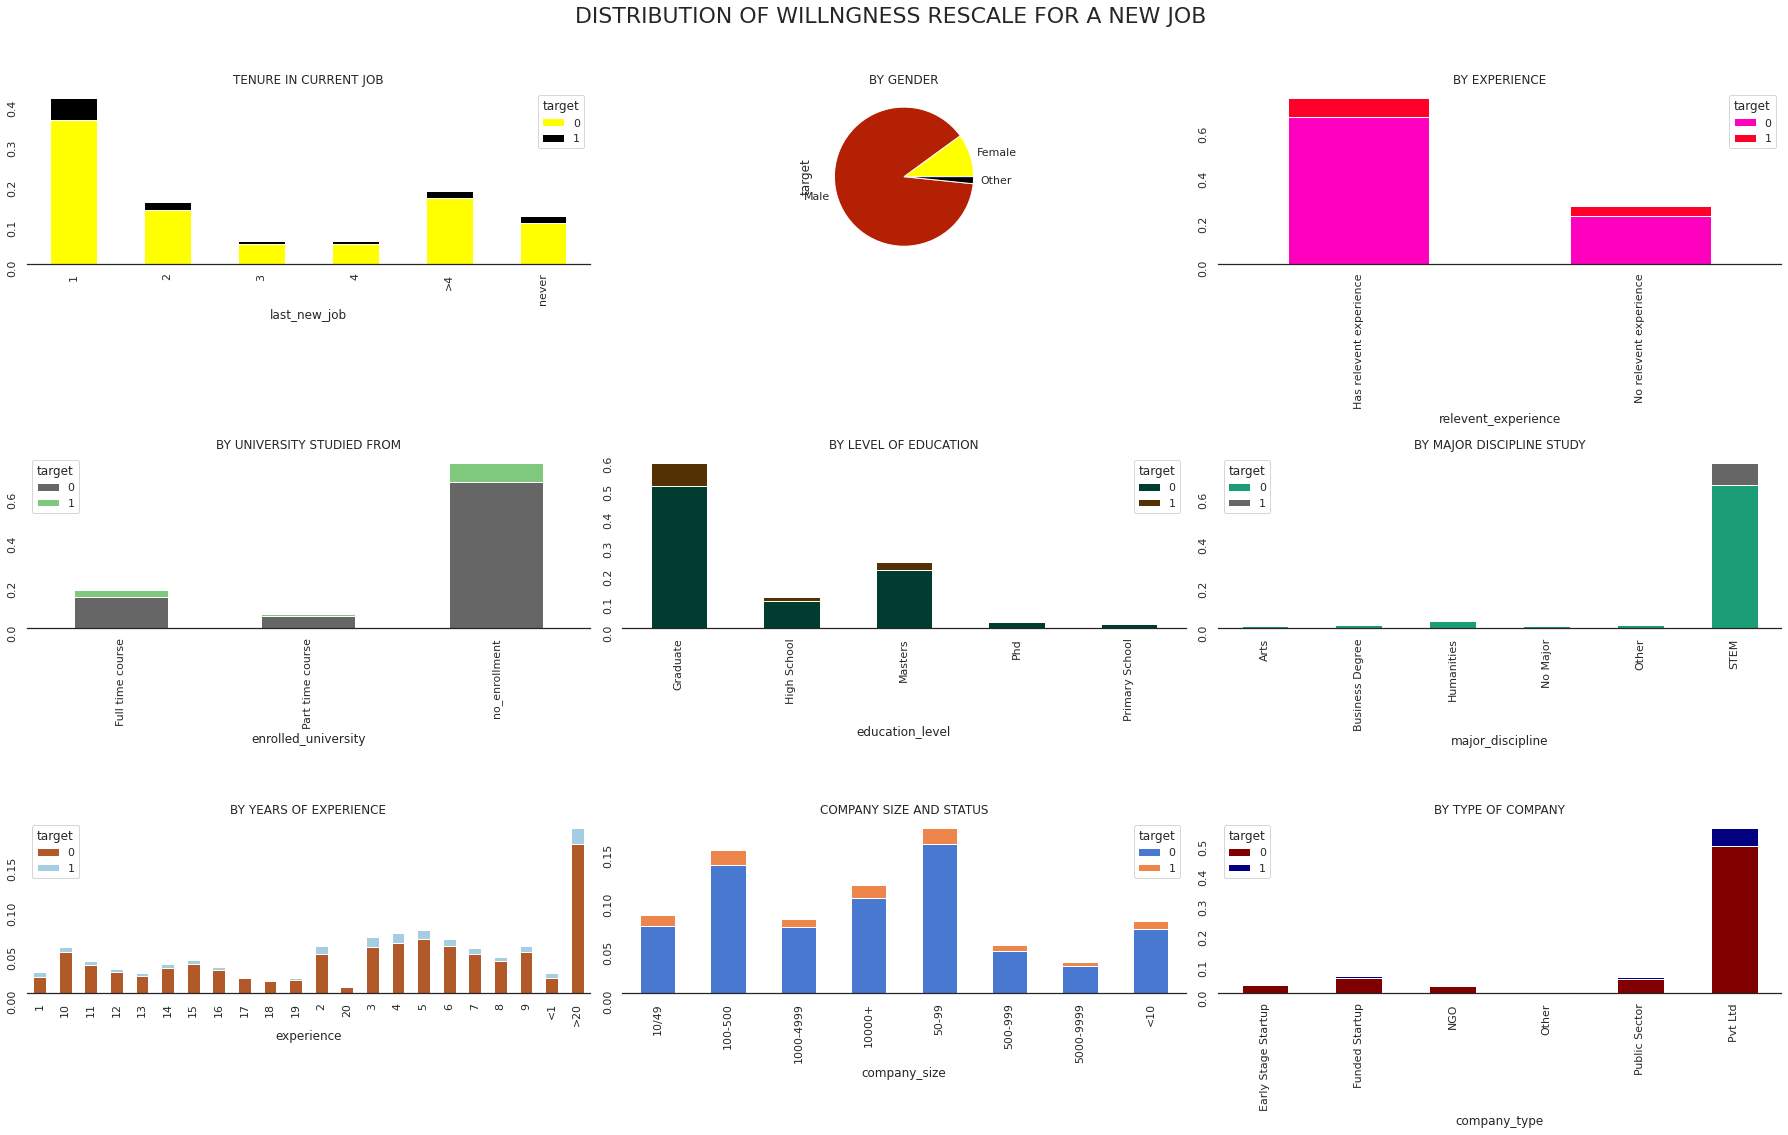

In [ ]:
sns.set(style="white", palette="muted", color_codes=True,font_scale=1)

# Set up the matplotlib figure
f, axes = plt.subplots(3,3, figsize=(25,15))
sns.despine(left=True)
my_colors = 'rgbkymc'
plt.suptitle('DISTRIBUTION OF WILLNGNESS RESCALE FOR A NEW JOB ',y=1.05, fontsize=22)

ax1= pd.crosstab(df.last_new_job ,df.target).apply(lambda r: r/len(df), 
                                                   axis=1).plot(kind='bar',stacked=True, ax= axes[0,0],
                                                                colormap='gnuplot_r').set_title('TENURE IN CURRENT JOB')


ax2= df.target.groupby(df.gender).sum().plot(kind='pie', 
                                             labels=df.target.groupby(df.gender).sum().index,ax=axes[0,1],
                                             colormap='gnuplot_r').set_title('BY GENDER')


ax3= pd.crosstab(df.relevent_experience ,df.target).apply(lambda r: r/len(df), 
                                                          axis=1).plot(kind='bar',stacked=True, ax= axes[0,2],
                                                                       colormap='gist_rainbow_r').set_title('BY EXPERIENCE')

ax4= pd.crosstab(df.enrolled_university ,df.target).apply(lambda r: r/len(df), 
                                                          axis=1).plot(kind='bar',stacked=True, ax= axes[1,0],
                                                                       colormap='Accent_r').set_title('BY UNIVERSITY STUDIED FROM')


ax5= pd.crosstab(df.education_level ,df.target).apply(lambda r: r/len(df), 
                                                      axis=1).plot(kind='bar',stacked=True, ax= axes[1,1],
                                                                   colormap='BrBG_r').set_title('BY LEVEL OF EDUCATION')


ax6= pd.crosstab(df.major_discipline ,df.target).apply(lambda r: r/len(df),
                                                       axis=1).plot(kind='bar',stacked=True, ax= axes[1,2],
                                                                    colormap='Dark2').set_title('BY MAJOR DISCIPLINE STUDY')

ax7= pd.crosstab(df.experience ,df.target).apply(lambda r: r/len(df), 
                                                 axis=1).plot(kind='bar',stacked=True, ax= axes[2,0],
                                                              colormap='Paired_r').set_title('BY YEARS OF EXPERIENCE')

ax8= pd.crosstab(df.company_size ,df.target).apply(lambda r: r/len(df), 
                                                   axis=1).plot(kind='bar',stacked=True, ax= axes[2,1]).set_title('COMPANY SIZE AND STATUS')

ax9= pd.crosstab(df.company_type ,df.target).apply(lambda r: r/len(df), 
                                                   axis=1).plot(kind='bar',stacked=True, ax= axes[2,2],
                                                                colormap='jet_r').set_title('BY TYPE OF COMPANY')

for ax in f.axes:
    ax.tick_params(labelrotation=90)
    
 
plt.tight_layout()
plt.show()

####Summary: 
In addition to developing skills to stay competitive in their current role, the vast majority of enrollees are also willing to learn new skills in order to qualify for a new job: around 17% are open to reskilling under any circumstances, out of that, around 70% male population would reskill.The influnce of variable last_new_job towards the target variable is carrying relevence with 1,2,>4 & never categories, rest of the categories doesnot carry any information on the williness to join the organisation.Relevent experience almost shares equal percentage of willness wrt each category. On the similar note rest of each feature can be comprehended along with thier respective categories and its importance towards willingness status.





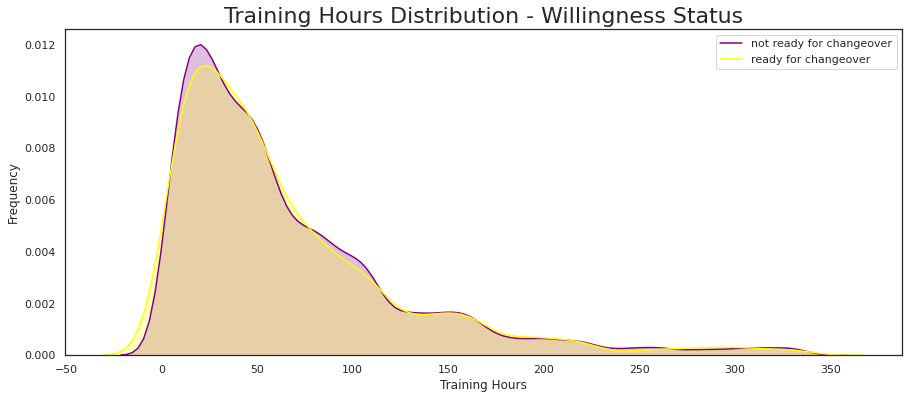

In [ ]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['target'] == 0),'training_hours'] , color='purple',shade=True,label='not ready for changeover')
ax=sns.kdeplot(df.loc[(df['target'] == 1),'training_hours'] , color='yellow',shade=True, label='ready for changeover')
ax.set(xlabel='Training Hours', ylabel='Frequency')
plt.title('Training Hours Distribution - Willingness Status',fontdict={'fontsize': 22, 'fontweight': 'medium'})
plt.show()

####The distribution of willingness status (0,1) on training hours is similar. The  willingness status is high between 1 & 50 hrs of training,a moderate willingness status is exhibited between 50 & 100 hrs , between 100 & 200 almost very minimum willingness is shown and post 200 it is almost nil. So the training hrs can be split into four categories i.e strong, medium, few and nil.

## DATA IDEATION:
The unilateral approach created the premise for the hypothesis from which this study is sprung, namely: “enrollees in the Training centre share a pattern of behavior prior for the willingness to either opt for new job or to continue with their existing employment.  This pattern of behavior can be detected and used to predict enrollees for opting new changeover with the aid of machine learning”. The intuitive connection between behavior and willingness to opt for new employment has been documented in previous studies along with studies showing that enrollees share behavioral progression patterns surmounting to the willingness status

###Hypothesis Testing: Is there any significant influence in the amount of training hrs to the enrollees for opting a changeover. 
•	**Null Hypothesi**s:  The null hypothesis would be that there is no  difference in changeover option level on the enrollees post training.

•	**Alternate Hypothesis**:  The alternate hypothesis would be that there is an amount of  difference in changeover option level on the  enrollees after the training.

Two-Sample T-Test
A two-sample t-test investigates whether the means of two independent data samples differ from one another. In a two-sample test, the null hypothesis is that the means of both groups are the same. Unlike the one sample-test where we test against a known population parameter, the two sample test only involves sample means. 



In [ ]:
enrollee_not_interested = df['training_hours'][df['target'] == 0].mean()
enrollee_interested = df['training_hours'][df['target'] == 1].mean()
mean_tr_hrs = df['training_hours'].mean()
print( 'The mean willingness of  enrollees not interested is: ' + str(enrollee_not_interested))
print( 'The mean willingness of enrollees interestest is: ' + str(enrollee_interested) )
print( 'The mean of total training hours: ' + str(mean_tr_hrs))

The mean willingness of  enrollees not interested is: 66.01148487510983
The mean willingness of enrollees interestest is: 65.16
The mean of total training hours: 65.89901410752219


In [ ]:
cat1 = df[df['target']==0]
cat2 = df[df['target']==1]

ttest,pval= ttest_ind(cat1['training_hours'], cat2['training_hours'],equal_var= False)
print(pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" The null hypothesis is REJECTED")
else:
  print("The null hypothesis is ACCEPTED")


0.5203590391460922
The null hypothesis is ACCEPTED


###The test yields a p-value of 0.5203, which means there is a 52% chance we'd see sample data this far apart if the two groups tested are actually identical. If we were using a 95% confidence level we would fail to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 5%. So there is no difference in change over option on the enrolles after the training schedule.


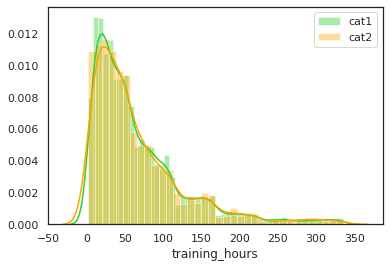

In [ ]:
plt.figure("Test Samples")
sns.distplot(cat1['training_hours'], label='cat1',color='limegreen') 
sns.distplot(cat2['training_hours'], label='cat2',color='orange')
plt.legend()
plt.show()

In [ ]:
ztest ,pval1 = stests.ztest(cat1['training_hours'], x2=cat2['training_hours'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("REJECT null hypothesis")
else:
    print("ACCEPT null hypothesis")

0.5211454640731501
ACCEPT null hypothesis


In [ ]:
data= df.copy()
cat_col = data.select_dtypes(include=['object']).columns
cat_col

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'target'],
      dtype='object')

In [ ]:
le = LabelEncoder()

for cols in cat_col:
    data[cols] = le.fit_transform(data[cols].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18359 entries, 23798 to 5995
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18359 non-null  int64  
 1   city_development_index  18359 non-null  float64
 2   gender                  18359 non-null  int64  
 3   relevent_experience     18359 non-null  int64  
 4   enrolled_university     18359 non-null  int64  
 5   education_level         18359 non-null  int64  
 6   major_discipline        18359 non-null  int64  
 7   experience              18359 non-null  int64  
 8   company_size            18359 non-null  int64  
 9   company_type            18359 non-null  int64  
 10  last_new_job            18359 non-null  int64  
 11  training_hours          18359 non-null  int64  
 12  target                  18359 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 2.0 MB
None


##The chi-square statistic is one way to show a relationship between the categorical variables in the dataset. 
Hypothesis
*   H0 : All the variables are independent.
*   H1 : All the variables are not independent.




In [ ]:
X_chi= data.drop('target',axis=1)
y_chi = data['target']
chi_scores = chi2(X_chi,y_chi)
chi_scores

(array([1.72652715e+02, 4.84511454e+00, 1.07374193e+01, 7.46287812e+01,
        7.51808075e+01, 3.02420186e+01, 2.06272648e-02, 1.46470143e+01,
        1.82786441e+02, 1.67692916e+01, 6.52299400e-01, 2.31559441e+01]),
 array([1.94900340e-39, 2.77245511e-02, 1.04990653e-03, 5.68089452e-18,
        4.29522115e-18, 3.81357334e-08, 8.85799006e-01, 1.29639841e-04,
        1.19413192e-41, 4.22109079e-05, 4.19291782e-01, 1.49380728e-06]))

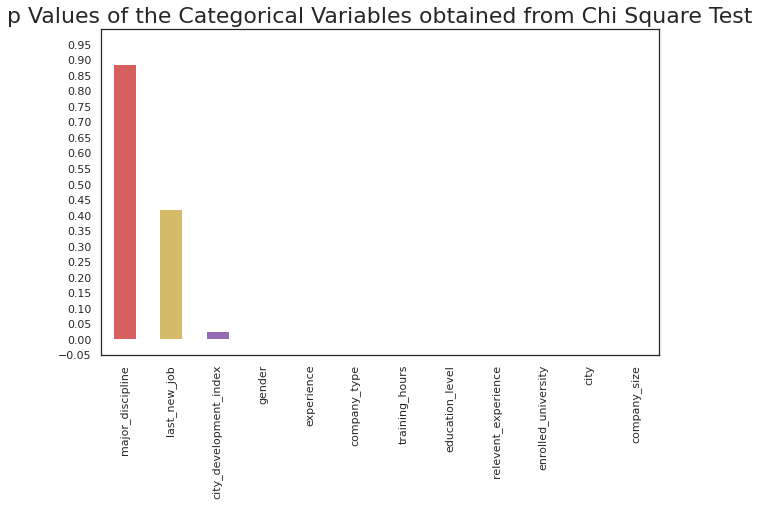

In [ ]:
p_values = pd.Series(chi_scores[1],index = X_chi.columns)
p_values.sort_values(ascending = False , inplace = True)
fig = plt.figure(figsize=(10,6))
my_colors = list('rymc')
p_values.plot.bar(color = my_colors)
plt.ylim([-.01, 1])
plt.yticks(np.arange(-.05, 1, 0.05))
plt.title('p Values of the Categorical Variables obtained from Chi Square Test',fontdict={'fontsize': 22, 'fontweight': 'medium'})
plt.show()

###The variables major_discipline, last_new_job and city_development_index has high p Values and it can be dropped from our dataset.

In [ ]:
ref_cat= df[['major_discipline','last_new_job','city_development_index','city']]
ref_cat= df_test[['major_discipline','last_new_job','city_development_index','city']]
df.drop(ref_cat,axis=1,inplace=True)
df_test.drop(ref_cat,axis=1,inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15021 entries, 16548 to 32641
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               11633 non-null  object
 1   relevent_experience  15021 non-null  object
 2   enrolled_university  14742 non-null  object
 3   education_level      14626 non-null  object
 4   experience           14977 non-null  object
 5   company_size         10970 non-null  object
 6   company_type         10691 non-null  object
 7   training_hours       15021 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.0+ MB


#Feature Engineering:
As per the distribution of independent variables, some of the categories in respective features can be clubbed as they don't contribute much to the target variable.

In [ ]:
 conditions  = [df.training_hours <1, df.training_hours < 50,df.training_hours < 75,df.training_hours < 100,df.training_hours < 150,
               df.training_hours < 200,df.training_hours >= 200]
choices     = [ "initiators", 'desperate', 'strong_willingness','medium_willingness','mild_willingness','low_willingness','no_urge']

df["training_hours"] = np.select(conditions, choices)


In [ ]:
conditions  = [df_test.training_hours <1, df_test.training_hours < 50,df_test.training_hours < 75,df_test.training_hours < 100,df_test.training_hours < 150,
               df_test.training_hours < 200,df_test.training_hours >= 200]
df_test["training_hours"] = np.select(conditions, choices)

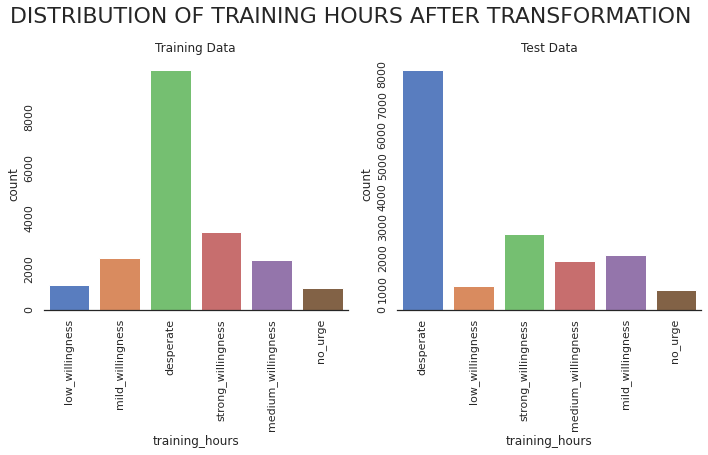

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(10,6))
sns.despine(left=True)

plt.suptitle('DISTRIBUTION OF TRAINING HOURS AFTER TRANSFORMATION ',y=1.05, fontsize=22)

sns.countplot(df['training_hours'].sort_index(), ax=ax[0]).set_title('Training Data')
sns.countplot(df_test['training_hours'].sort_index(), ax=ax[1]).set_title('Test Data')

for ax in fig.axes:
    ax.tick_params(labelrotation=90)

plt.tight_layout()

plt.show()


###Filling Missing Values: There are different approaches towards those values, depending mainly on the reason behind the presence of missing values. In general, data could miss in three different ways:

####At Random: it means that the fact that one entry is missing does not depend on its value, but on that of other entries (not missing)
####Completely at Random: the fact that one entry is missing in neither related to that entry nor to any other entry
####Not at Random: it exists a correlation between the absence of values and some other factors, which might be hypothetical (‘out-of-data’ hypothesis) or included among the variables of the same dataset.

###Nullity Matrix: The nullity matrix gives a data-dense display and missing data patterns in the dataset & can be easily eyeballed. Also, the sparkline on the right is a summary of the general shape of the data completeness and an indicator of the rows with maximum and minimum rows, 8 here means that the max number of non null values any row has in the data base is eight).The picture below shows the amount and positions of missing values. The idea is to capture not only missing values, but also data sparsity. It is very intuitive to interpret, plus generating an idea of the way missing values are distributed withing a variable and among variables

<Figure size 720x432 with 0 Axes>

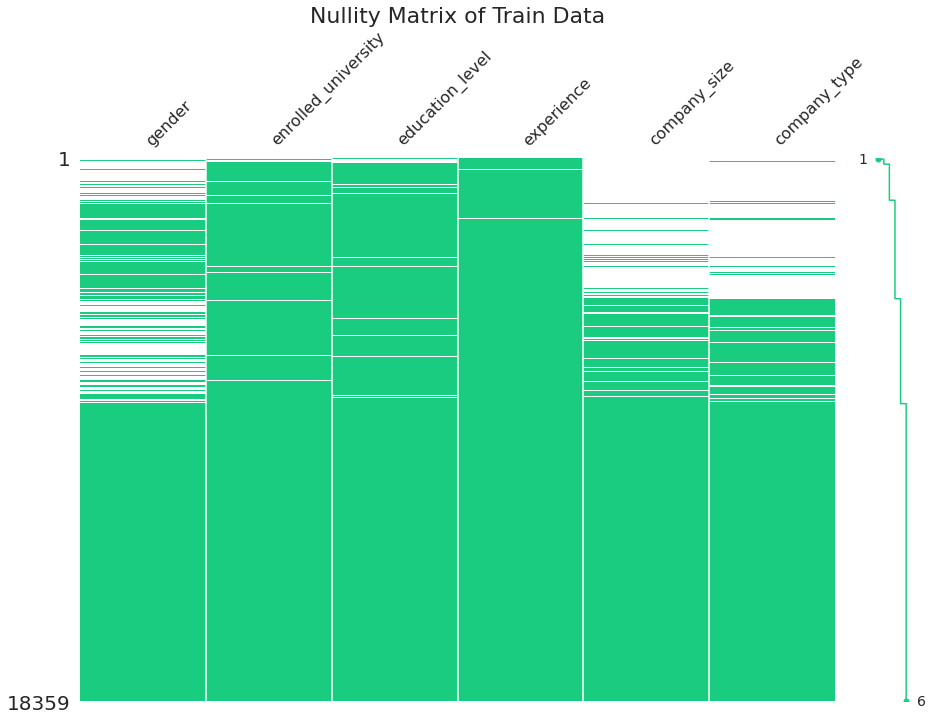

In [ ]:
fig = plt.figure(figsize=(10,6))
missingdata_df = df.columns[df.isnull().any()].tolist()
msno.matrix(df[missingdata_df],figsize=(15,10),color=(.10,.80,.50),sort='ascending',filter='top')
plt.title('Nullity Matrix of Train Data',fontdict={'fontsize': 22, 'fontweight': 'medium'})
plt.show()

### Heat Map
#### A simple correlation map describes the degree of nullity relationship between the different features. Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).. Features with no missing value are excluded in the heatmap. If the nullity correlation is very close to zero (-0.05 < R < 0.05), no value will be displayed. Also, a perfect positive nullity correlation (R=1) indicates when the first feature and the second feature both have corresponding missing values while a perfect negative nullity correlation (R=-1) means that one of the features is missing and the second is not missing.As you can see, it seems to be a high positive correlation between the absence of values in  company_type and company_size as there are almost equal number of missing data.

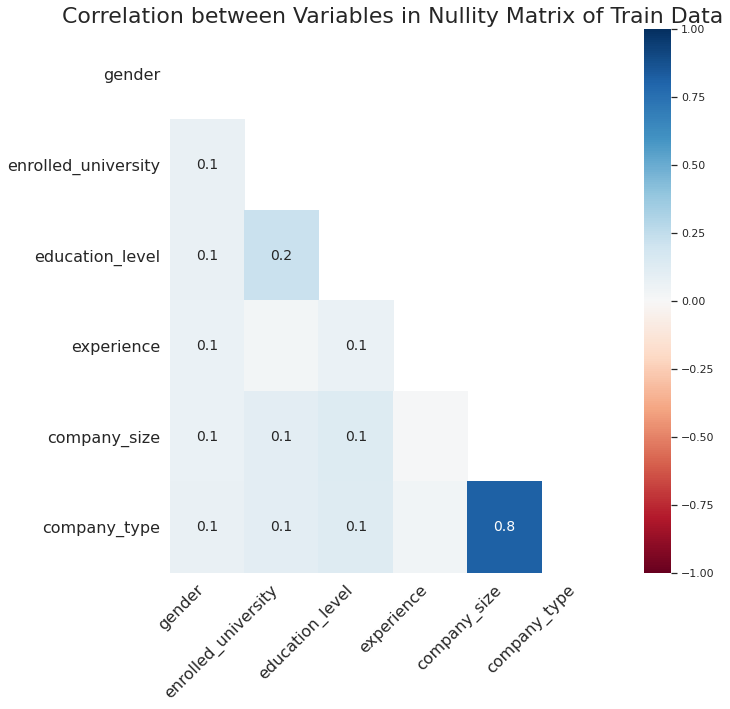

In [ ]:
msno.heatmap(df[missingdata_df], figsize=(10,10))
plt.title('Correlation between Variables in Nullity Matrix of Train Data',fontdict={'fontsize': 22, 'fontweight': 'medium'})
plt.show()

###Missing Values Dendogram:
####The dendrogram uses a hierarchical clustering algorithm to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.
#### The features company_size,gender and company_type contibute more missing values and imputing the missing values would be a real guess work.Hence, this might be a case where deleting an entire feature wouldn’t affect that much the reliability of our potential algorithm. However, a similar understanding on the significance of the valid clusters can be derived from the longest vertical line(without any intersection by the horizontal line) method.

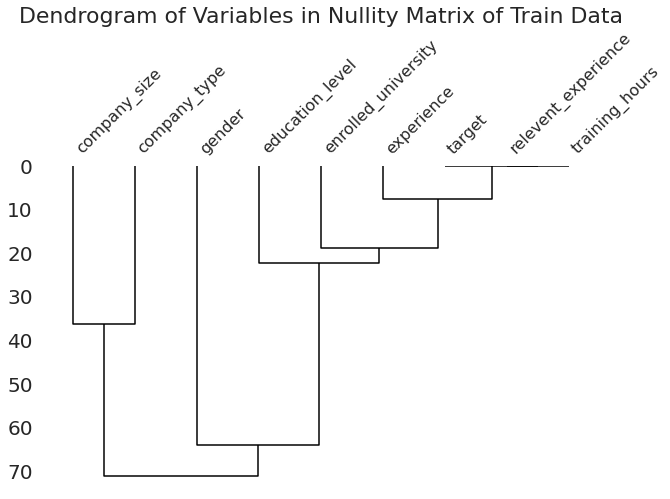

In [ ]:
msno.dendrogram(df,figsize=(10,6))
plt.title('Dendrogram of Variables in Nullity Matrix of Train Data',fontdict={'fontsize': 22, 'fontweight': 'medium'})
plt.show()

In [ ]:
missingvalues_prop = (df.isnull().sum()/len(df)).reset_index()
missingvalues_prop.columns = ['field','proportion']
missingvalues_prop = missingvalues_prop.sort_values(by = 'proportion', ascending = False)
print(missingvalues_prop)


                 field  proportion
6         company_type    0.274470
5         company_size    0.260308
0               gender    0.223215
3      education_level    0.024892
2  enrolled_university    0.018628
4           experience    0.003214
1  relevent_experience    0.000000
7       training_hours    0.000000
8               target    0.000000


#### The propotion of missing values more than 20% can be dropped and as inferred eralier these variables may not contribute significantly while building a robust model.

In [ ]:
ref_cat=['company_type','company_size','gender']
df.drop(ref_cat,axis=1,inplace=True)
df_test.drop(ref_cat,axis=1,inplace=True)

####It is observed that the no_info category doesnot have any information on the williness for the changeover, it can be clubbed with the no_enrollment category as it won't affect the distribution much.


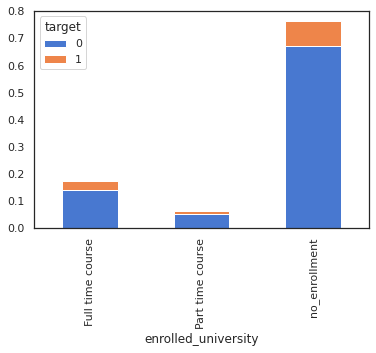

In [ ]:
df.enrolled_university.fillna('no_enrollment', inplace=True)
df_test.enrolled_university.fillna('no_enrollment', inplace=True)
pd.crosstab(df.enrolled_university ,df.target).apply(lambda r: r/len(df)).plot(kind='bar',stacked=True)

In [ ]:
df.education_level.fillna('no_info',inplace=True)
df_test.education_level.fillna('no_info',inplace=True)

In [ ]:
df['education_level'] = df['education_level'].replace({'Phd': 'other', 'Primary School': 'other', 'no_info': 'other'})
df_test['education_level'] = df_test['education_level'].replace({'Phd': 'other', 'Primary School': 'other', 'no_info': 'other'})

In [ ]:
df.experience.fillna(5, inplace=True)
df_test.experience.fillna(5, inplace=True)
df['experience'] = df['experience'].replace({'<1': .5, '>20': 21})
df_test['experience'] = df_test['experience'].replace({'<1': .5, '>20': 21})
df['experience'] = df['experience'].astype(int)
df_test['experience'] = df_test['experience'].astype(int)

###The experience feature is transformed into 9 segment categories as per thier contribution towards the target value distribution.

In [ ]:
conditions  = [df.experience > 20, df.experience > 17,df.experience > 14,df.experience > 11,df.experience > 8,
               df.experience > 5,df.experience > 3,df.experience > 1,df.experience <= 1]
choices     = [ "passionate", 'long_eng', 'searchers','surged','copped','graduated','laced','roied','abinitio']

df["experience"] = np.select(conditions, choices)



In [ ]:
conditions  = [df_test.experience > 20, df_test.experience > 17,df_test.experience > 14,df_test.experience > 11,df_test.experience > 8,
               df_test.experience > 5,df_test.experience > 3,df_test.experience > 1,df_test.experience <= 1]
choices     = [ "passionate", 'long_eng', 'searchers','surged','copped','graduated','laced','roied','abinitio']

df_test["experience"] = np.select(conditions, choices)

In [ ]:
df.head()

,relevent_experience,enrolled_university,education_level,experience,training_hours,target
enrollee_id,,,,,,
23798,Has relevent experience,no_enrollment,Graduate,roied,mild_willingness,0
29166,Has relevent experience,no_enrollment,Graduate,surged,strong_willingness,0
46,Has relevent experience,no_enrollment,Graduate,graduated,desperate,0
18527,Has relevent experience,no_enrollment,Graduate,surged,desperate,0
21751,No relevent experience,no_enrollment,Masters,graduated,medium_willingness,1


In [ ]:
df_test.head()

,relevent_experience,enrolled_university,education_level,experience,training_hours
enrollee_id,,,,,
16548,No relevent experience,Full time course,Graduate,abinitio,desperate
12036,No relevent experience,no_enrollment,Graduate,passionate,medium_willingness
11061,No relevent experience,Full time course,Graduate,roied,desperate
5032,No relevent experience,no_enrollment,other,passionate,medium_willingness
17599,Has relevent experience,no_enrollment,Graduate,graduated,strong_willingness


In [ ]:
df.to_csv('/content/drive/My Drive/HR/train.csv')
df_test.to_csv('/content/drive/My Drive/HR/test.csv')

In [ ]:
train= pd.read_csv('/content/drive/My Drive/HR/train.csv')
test = pd.read_csv('/content/drive/My Drive/HR/test.csv')
train.head(1)

,enrollee_id,relevent_experience,enrolled_university,education_level,experience,training_hours,target
0,23798,Has relevent experience,no_enrollment,Graduate,roied,mild_willingness,0


In [ ]:
test.head(1)

,enrollee_id,relevent_experience,enrolled_university,education_level,experience,training_hours
0,16548,No relevent experience,Full time course,Graduate,abinitio,desperate


In [ ]:
test.set_index('enrollee_id',inplace=True)
test.head(1)

,relevent_experience,enrolled_university,education_level,experience,training_hours
enrollee_id,,,,,
16548,No relevent experience,Full time course,Graduate,abinitio,desperate


####Converting the feature categories into dummy variables.

In [ ]:
mod_df_dummies=[pd.get_dummies(train['relevent_experience'],prefix='relevent_experience',prefix_sep=':',drop_first=True),
pd.get_dummies(train['enrolled_university'],prefix='enrolled_university',prefix_sep=':',drop_first=True),
pd.get_dummies(train['education_level'],prefix='education_level',prefix_sep=':',drop_first=True),
pd.get_dummies(train['experience'],prefix='experience',prefix_sep=':',drop_first=True),
pd.get_dummies(train['training_hours'],prefix='training_hours',prefix_sep=':',drop_first=True)]

In [ ]:
mod_df_test_dummies=[pd.get_dummies(test['relevent_experience'],prefix='relevent_experience',prefix_sep=':',drop_first=True),
pd.get_dummies(test['enrolled_university'],prefix='enrolled_university',prefix_sep=':',drop_first=True),
pd.get_dummies(test['education_level'],prefix='education_level',prefix_sep=':',drop_first=True),
pd.get_dummies(test['experience'],prefix='experience',prefix_sep=':',drop_first=True),
pd.get_dummies(test['training_hours'],prefix='training_hours',prefix_sep=':',drop_first=True)]

In [ ]:
mod_df_dummies= pd.DataFrame(mod_df_dummies,index=train.index)
mod_df_test_dummies= pd.DataFrame(mod_df_test_dummies,index=test.index)

In [ ]:
train_y = train["target"].values
train_X = mod_df_dummies

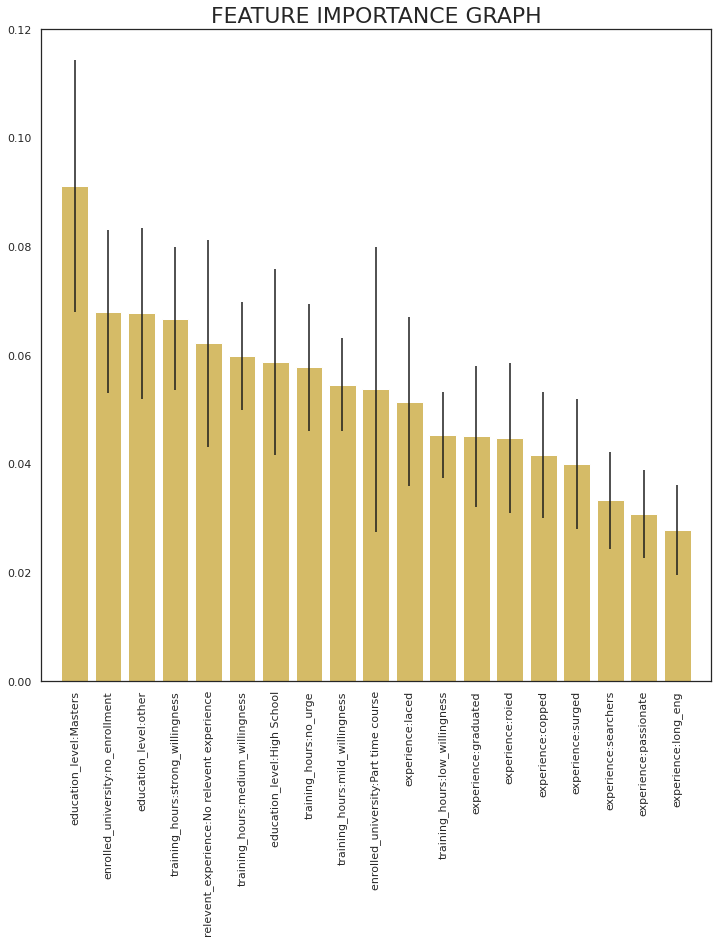

In [ ]:
model = ensemble.ExtraTreesRegressor(n_estimators=200, max_depth=20, max_features=0.5, n_jobs=-1, random_state=0)
model.fit(train_X, train_y)

## plot the importances ##
feat_names = train_X.columns.values
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("FEATURE IMPORTANCE GRAPH",fontdict={'fontsize': 22, 'fontweight': 'medium'})
plt.bar(range(len(indices)), importances[indices], color="y", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

#### All the features exhibits importance.

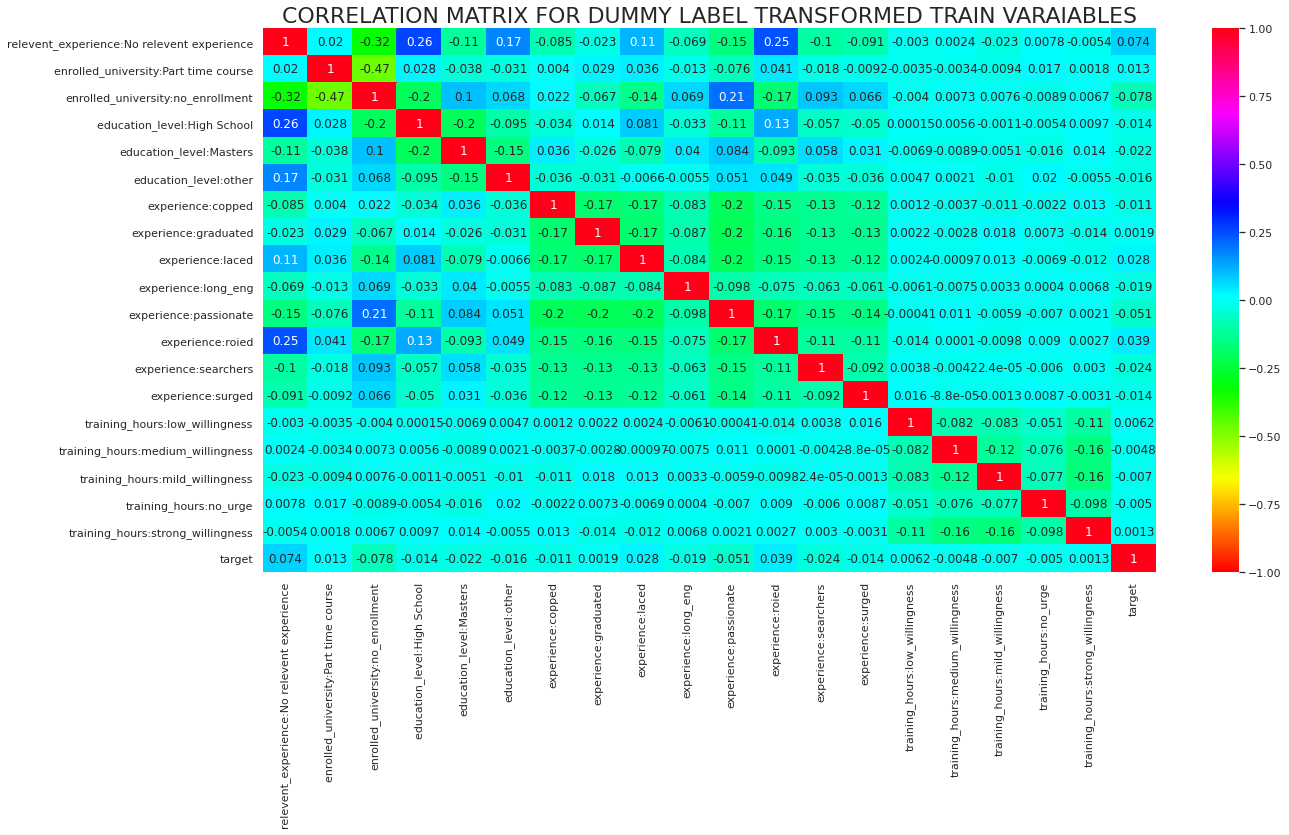

In [ ]:
corr = mod_df_dummies.corr()
sns.heatmap(corr,  vmax=1,vmin=-1,
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap='hsv',annot= True)
plt.title("CORRELATION MATRIX FOR DUMMY LABEL TRANSFORMED TRAIN VARAIABLES",fontdict={'fontsize': 22, 'fontweight': 'medium'})
plt.gcf().set_size_inches((20, 10))
plt.show()

####Correlation between train variables are not too high

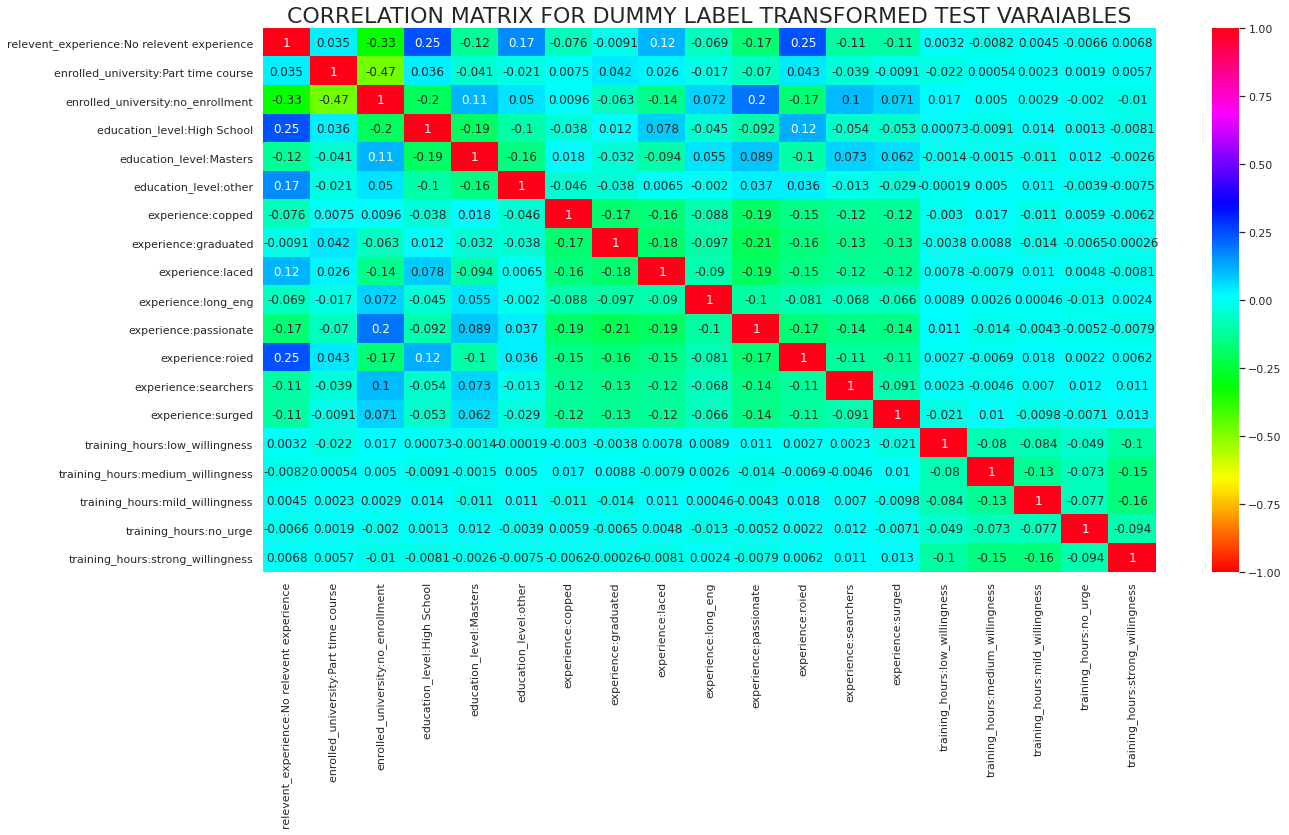

In [ ]:
corr = mod_df_test_dummies.corr()
sns.heatmap(corr,  vmax=1,vmin=-1,
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap='hsv',annot= True)
plt.title("CORRELATION MATRIX FOR DUMMY LABEL TRANSFORMED TEST VARAIABLES",fontdict={'fontsize': 22, 'fontweight': 'medium'})
plt.gcf().set_size_inches((20, 10))
plt.show()

####Correlation between test variables exhibits similar kind of pattern followed by train variables

###Recruitment is a significant part of a HR function in any Organisation, especially in today’s existing market. By measuring recruitment metrics, it is easy to understand the effectiveness of the hiring strategy truly and methods to improve it. A model can be built and which would reflect:

*   Leveraging existing data and providing an analytics to specific recruitment
benefits 
*   Using predictive analytics as a competitive advantage to the Training Institute.
*   Comprehension of Skills gap. 
*   Connect analytics with business needs.
*   Indugle in preparing, organizing new format data for building more expressive models.

Throughout this kernel it is  stressed on the importance of establishing an influence of training and its generic outcome on some of the independent & target variable(s). Building a robust scoring model will certainly lead to positive outcomes & will boost both future investments and the credibility of the Training Institute,thus making further success possible.






